# February, 16th 2021

**Motivation**: Correlation/network analysis on Ca data.<br>
**Results**:  In this document I focus on Ca sinals.

In [1]:
# HIDE CODE


import re
import os
import numpy as np
import pandas as pd
import nibabel as nib
from scipy.stats import pearsonr
from os.path import join as pjoin
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

base_dir = '/home/hadi/Documents/Ca-fMRI'
raw_dir = pjoin(base_dir, 'raw')
processed_dir = pjoin(base_dir, 'processed')
os.makedirs(processed_dir, exist_ok=True)

### Process data

In [ ]:
# HIDE CODE


shared_names = []
for file_name in sorted(os.listdir(raw_dir)):
    if '.gz' not in file_name:
        continue
    meta = file_name.split('_')
    sub = next(filter(lambda x: 'sub' in x, meta))
    ses = next(filter(lambda x: 'ses' in x, meta))
    run = next(filter(lambda x: 'run' in x, meta))
    task = next(filter(lambda x: 'task' in x, meta))
    shared_names.append('_'.join([sub, ses, task, run]))
shared_names = sorted(list(np.unique(shared_names)))

# process and save files
for keyword in tqdm(shared_names):
    selected_files = [f for f in os.listdir(raw_dir) if keyword in f]
    bold_file_name = next(filter(lambda x: 'bold' in x, selected_files))
    
    meta = bold_file_name.split('_')
    sub = next(filter(lambda x: 'sub' in x, meta))
    ses = next(filter(lambda x: 'ses' in x, meta))
    run = next(filter(lambda x: 'run' in x, meta))
    task = next(filter(lambda x: 'task' in x, meta))
    key = '_'.join([sub, ses, run, task])

    # bold
    with open(pjoin(raw_dir, bold_file_name)) as f:
        data = nib.load(f.name).get_fdata()
    
    save_filename = pjoin(processed_dir, key + '_bold.npy')
    np.save(save_filename, data)
    
    # ca
    ca_files = [item for item in selected_files if 'ca' in item]
    ca_data_list = []
    for ca_file_name in ca_files:
        with open(pjoin(raw_dir, ca_file_name)) as f:
            ca_data_list.append(nib.load(f.name).get_fdata())
    
    data = np.concatenate(ca_data_list, axis=-1)
    save_filename = pjoin(processed_dir, key + '_ca.npy')
    np.save(save_filename, data)


## Plots of Ca traces

Just like before, I'm plotting all traces to visually inspect quality.  These data that I selected for the analysis did not have the preprocessing error.

----------------------------------------------------------------------------------------------------


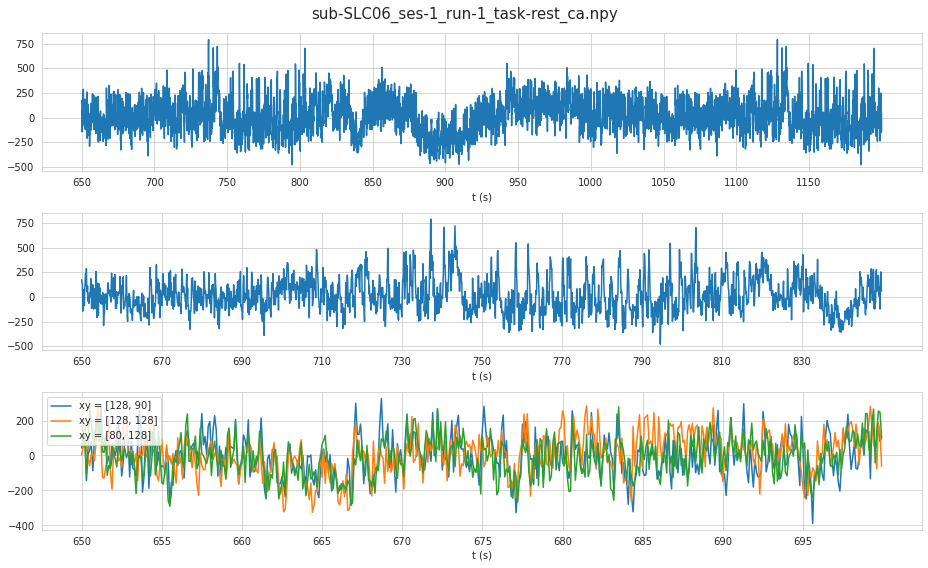

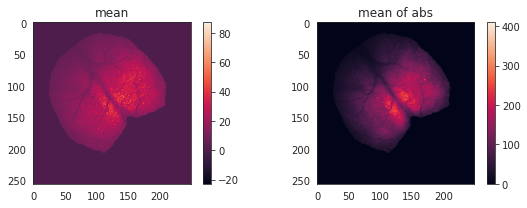

---------------------------------------------------------------------------------------------------- 




----------------------------------------------------------------------------------------------------


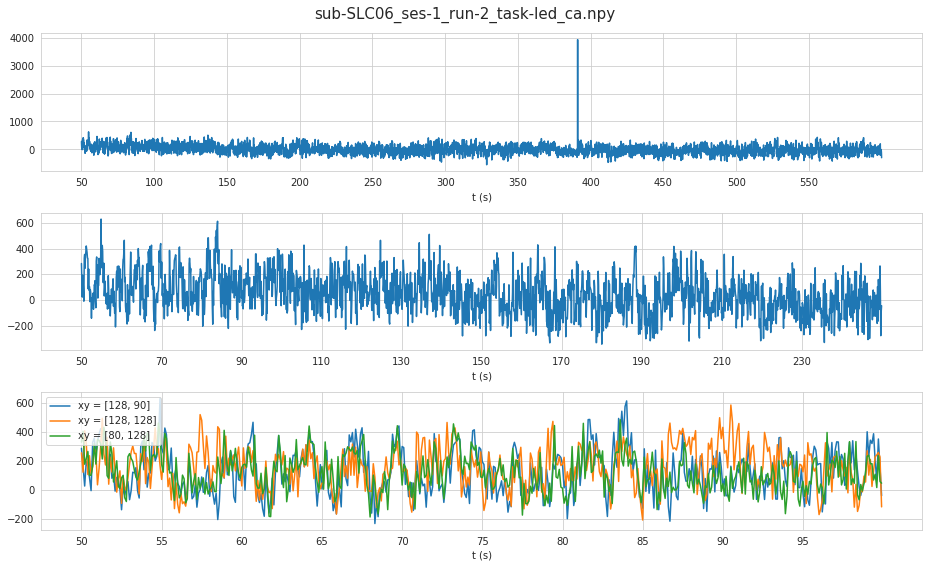

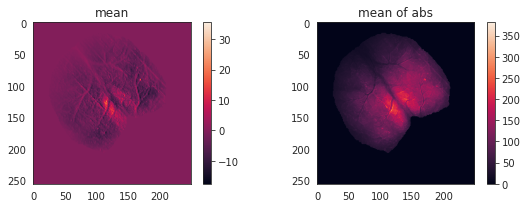

---------------------------------------------------------------------------------------------------- 




----------------------------------------------------------------------------------------------------


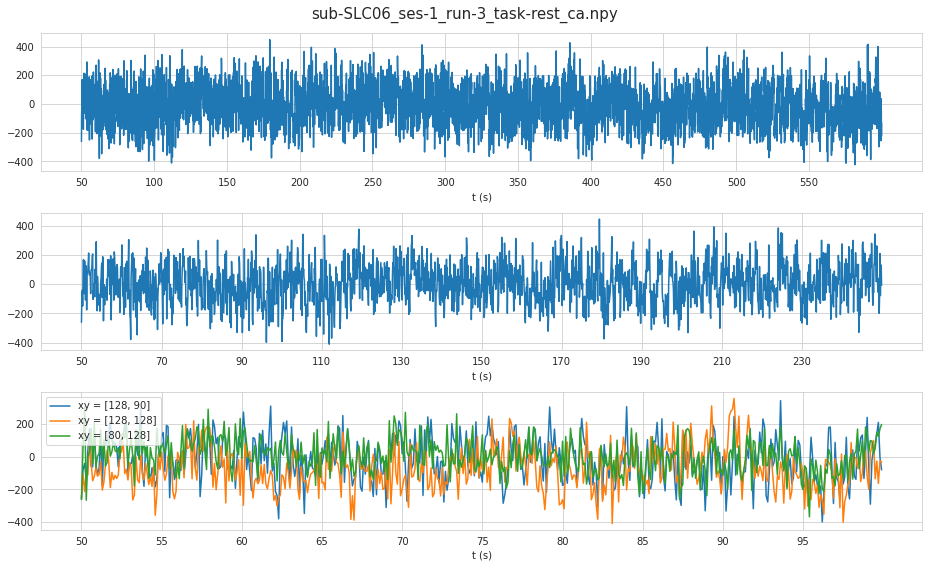

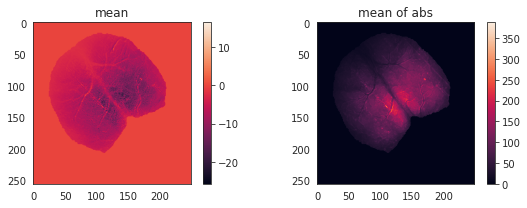

---------------------------------------------------------------------------------------------------- 




----------------------------------------------------------------------------------------------------


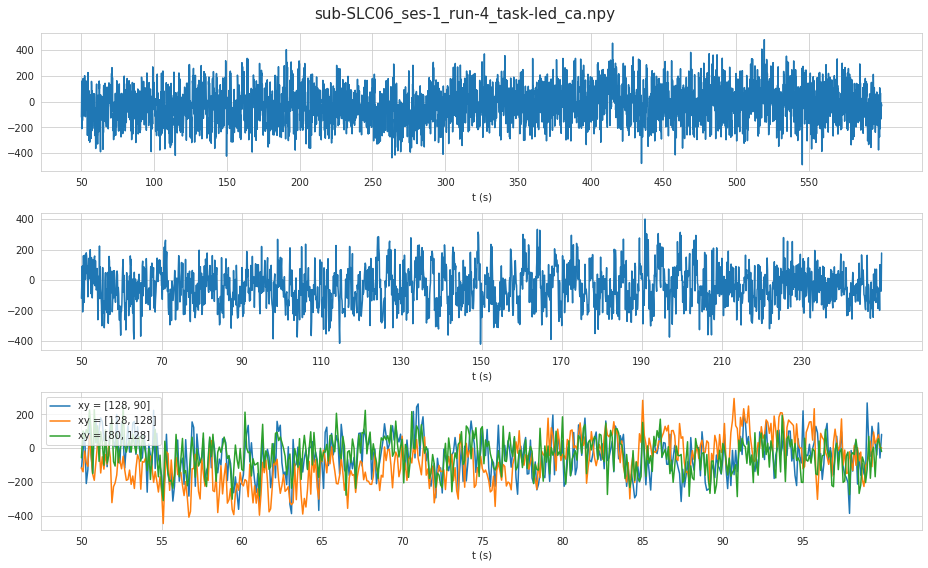

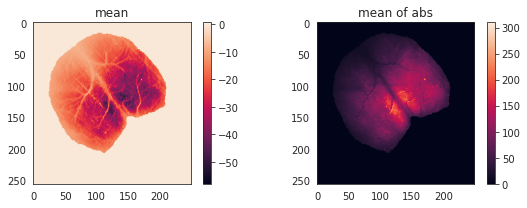

---------------------------------------------------------------------------------------------------- 




----------------------------------------------------------------------------------------------------


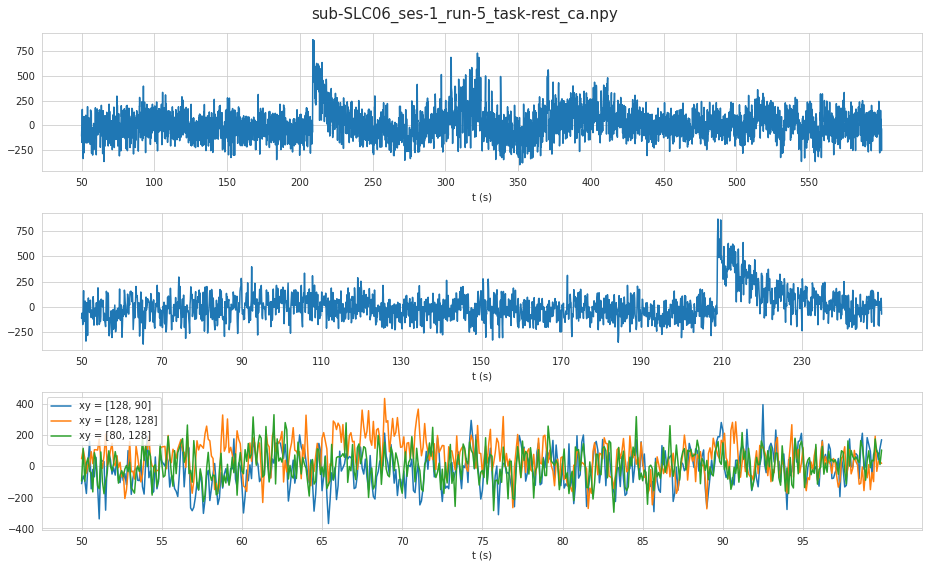

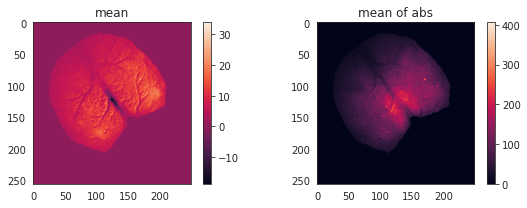

---------------------------------------------------------------------------------------------------- 




----------------------------------------------------------------------------------------------------


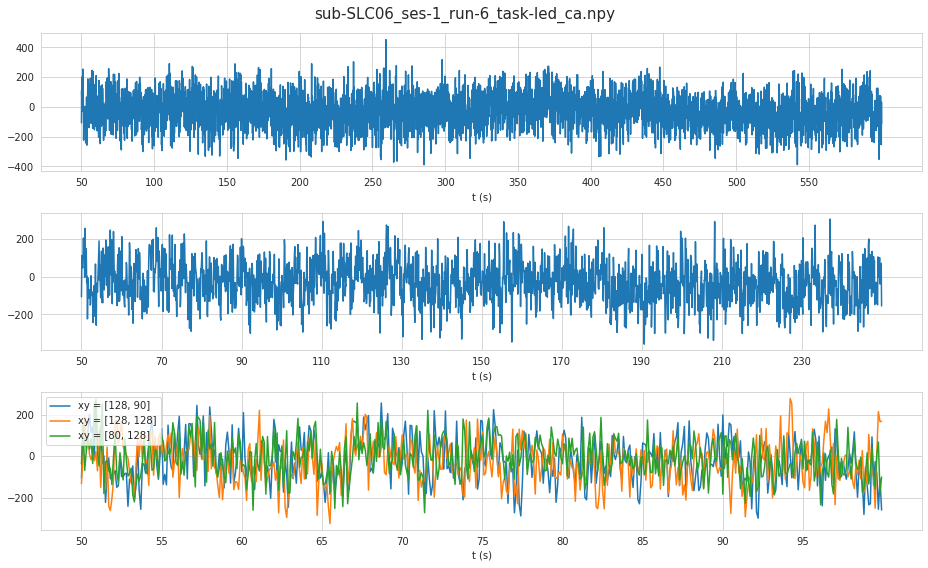

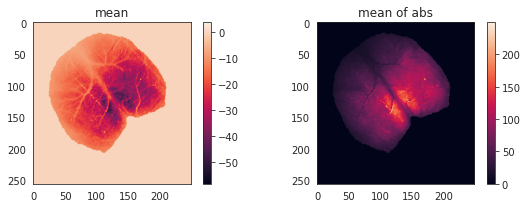

---------------------------------------------------------------------------------------------------- 




----------------------------------------------------------------------------------------------------


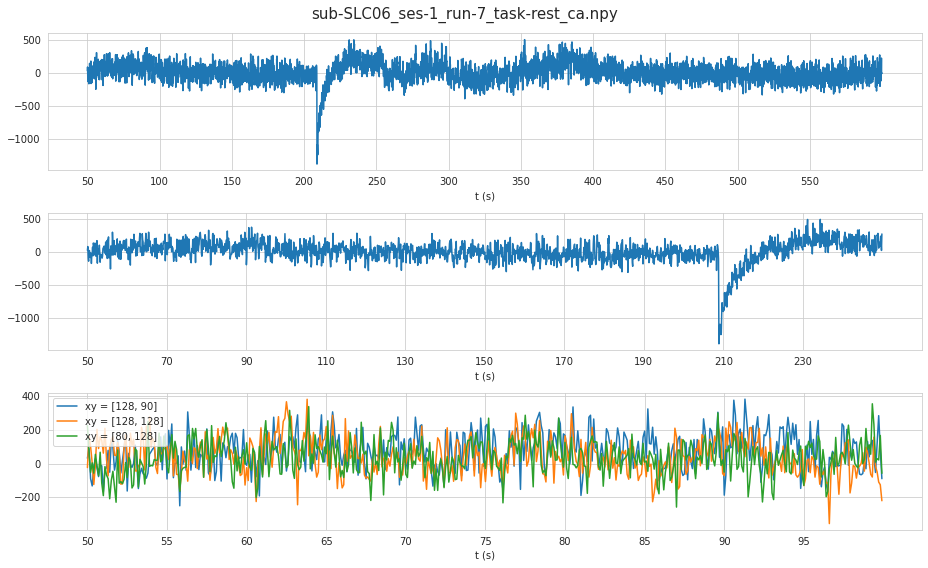

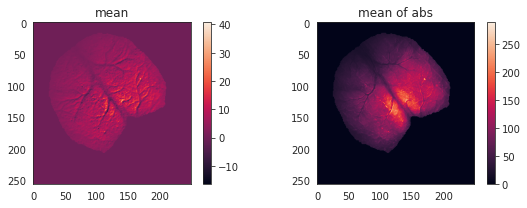

---------------------------------------------------------------------------------------------------- 






In [3]:
# HIDE CODE



expt_duration = 600   # 600 seconds
ca_frequency = 10
exclude_seconds = 50


for load_filename in sorted(filter(lambda x: 'ca' in x, os.listdir(processed_dir))):
    ca = np.load(pjoin(processed_dir, load_filename), mmap_mode='r')
    
    start = ca.shape[-1] - ((expt_duration - exclude_seconds) * ca_frequency)
    end = ca.shape[-1]
    
    # print("file name:  {:s}\tshape:  {}\ttrange included:  {}"
     #     .format(load_filename, ca.shape, [start, end]))
    trange = range(start, end)
    ca = ca[..., 0, trange]

    print('-' * 100)
    
    sns.set_style('whitegrid')
    plt.figure(figsize=(13, 8))
    
    plt.subplot(311)
    intvl = range(0, end - start)
    xticks = [item for item in intvl if item % (len(intvl) // 11) == 0]
    xtick_labels = [(item + start) // ca_frequency for item in xticks]
    plt.plot(ca[128, 90, intvl])
    plt.xticks(xticks, xtick_labels)
    plt.xlabel('t (s)')
    
    plt.subplot(312)
    intvl = range(0, 2000)
    xticks = [item for item in intvl if item % (len(intvl) // 10) == 0]
    xtick_labels = [(item + start) // ca_frequency for item in xticks]
    plt.plot(ca[128, 90, intvl])
    plt.xticks(xticks, xtick_labels)
    plt.xlabel('t (s)')
    
    plt.subplot(313)
    intvl = range(0, 500)
    xticks = [item for item in intvl if item % (len(intvl) // 10) == 0]
    xtick_labels = [(item + start) // ca_frequency for item in xticks]
    plt.plot(ca[128, 90, intvl], label='xy = [128, 90]')
    plt.plot(ca[128, 128, intvl], label='xy = [128, 128]')
    plt.plot(ca[80, 128, intvl], label='xy = [80, 128]')
    plt.xticks(xticks, xtick_labels)
    plt.xlabel('t (s)')
    plt.legend(loc='upper left')
    
    plt.suptitle(load_filename, fontsize=15)
    plt.tight_layout()
    plt.show()
    
    
    sns.set_style('white')
    plt.figure(figsize=(8, 3))

    plt.subplot(121)
    plt.imshow(ca.mean(-1))
    plt.colorbar()
    plt.title('mean')

    plt.subplot(122)
    plt.imshow(np.abs(ca).mean(-1))
    plt.colorbar()
    plt.title('mean of abs')

    plt.tight_layout()
    plt.show()
    
    print('-' * 100, '\n\n\n\n')

## Simple analysis

I choose a dataset that looks OK from subject named **sub-SLC08**.

In [2]:
# HIDE CODE



files = sorted(list(filter(lambda x: 'ca' in x and 'sub-SLC06' in x and 'rest' in x, os.listdir(processed_dir))))

expt_duration = 600   # 600 seconds
ca_frequency = 10
exclude_seconds = 50

data_list = []
for load_filename in files:
    ca = np.load(pjoin(processed_dir, load_filename), mmap_mode='r')
    start = ca.shape[-1] - ((expt_duration - exclude_seconds) * ca_frequency)
    end = ca.shape[-1]
    data_list.append(ca[..., 0, range(start, end)])
ca = np.concatenate(data_list, axis=-1)

files, ca.shape

(['sub-SLC06_ses-1_run-1_task-rest_ca.npy',
  'sub-SLC06_ses-1_run-3_task-rest_ca.npy',
  'sub-SLC06_ses-1_run-5_task-rest_ca.npy',
  'sub-SLC06_ses-1_run-7_task-rest_ca.npy'],
 (256, 250, 22000))

---
More errors in processing
---


In [3]:
ca.shape

(256, 250, 22000)

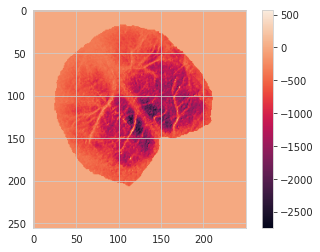

In [4]:
plt.imshow(ca[..., 18090])
plt.colorbar()

In [5]:
np.unravel_index(np.argmin(ca), ca.shape)

(139, 124, 18090)

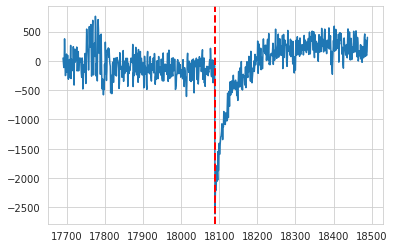

In [6]:
intvl = range(18090-400, 18090+400)
plt.plot(intvl, ca[127, 113, intvl])
plt.axvline(18090, color='red', ls='--', lw=2)

---

### Correlation analysis

Take a source signal from one of the "voxels" and compute its correlation with every other point. We should not call these voxels because this is different than fMRI data.  But then if not voxels, what should we call them for Ca data?

Anyway, I take signal from point (128, 128) on cortex surface and compute its correlation with every other point.  Here is how this correlation result looks like.

In [7]:
bad_x_indices = np.where(ca.mean(-1).mean(0) == 0)[0]
bad_y_indices = np.where(ca.mean(-1).mean(1) == 0)[0]

In [8]:
ca_reduced = np.delete(np.delete(ca, bad_x_indices, axis=1), bad_y_indices, axis=0)
ca.shape, ca_reduced.shape

((256, 250, 22000), (190, 186, 22000))

/home/hadi/.local/lib/python3.8/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


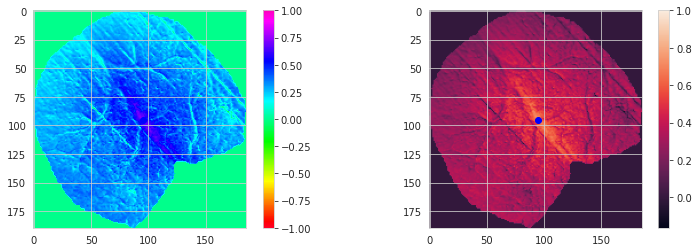

In [9]:
# HIDE CODE


source = (95, 95)
corrs = np.zeros(ca_reduced.shape[:-1])

for i in tqdm(range(ca_reduced.shape[0]), leave=False):
    for j in range(ca_reduced.shape[1]):
        r, p = pearsonr(ca_reduced[i, j, :], ca_reduced[source[0], source[1], :])
        if not np.isnan(r):
            corrs[i, j] = r

plt.figure(figsize=(13, 4))

plt.subplot(121)
plt.imshow(corrs, vmin=-1, vmax=1, cmap='gist_rainbow')
plt.plot(source[0], source[1], color='b', marker='o')
plt.colorbar()

plt.subplot(122)
plt.imshow(corrs)
plt.plot(source[0], source[1], color='b', marker='o')
plt.colorbar()
plt.show()

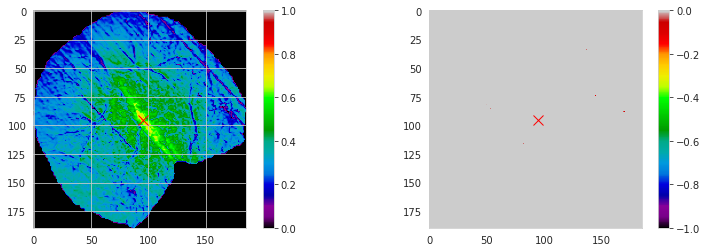

In [10]:
plt.figure(figsize=(13, 4))

plt.subplot(121)
plt.imshow(corrs, vmin=0, vmax=1, cmap='nipy_spectral')
plt.plot(source[0], source[1], color='r', marker='x', markersize=10)
plt.colorbar()

plt.subplot(122)
plt.imshow(corrs, vmin=-1, vmax=0, cmap='nipy_spectral')
plt.plot(source[0], source[1], color='r', marker='x', markersize=10)
plt.colorbar()
plt.show()

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

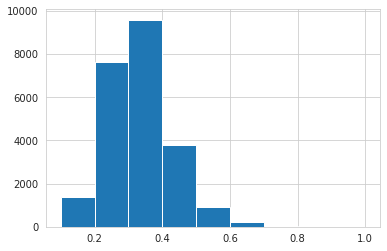

In [11]:
_ = plt.hist(corrs.flatten(), bins=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1.0])

### Downsample

In [129]:
size = 4
widths = [int(np.ceil(item / size)) for item in ca_reduced.shape[:2]]

nt = ca_reduced.shape[-1]

downsampled = np.zeros((size, size, nt))
for i in range(size):
    for j in range(size):
        data = ca_reduced[widths[0]*i:widths[0]*(i+1), widths[1]*j:widths[1]*(j+1), :]
        num_nonzero = sum(data.mean(-1).flatten() != 0)
        if num_nonzero > 0:
            downsampled[i, j, :] = data.reshape(-1, nt).sum(0) / num_nonzero
        else:
            downsampled[i, j, :] = 0.

downsampled.shape

(4, 4, 22000)

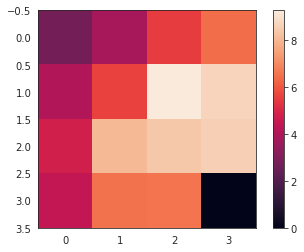

In [130]:
sns.set_style('white')
plt.imshow(downsampled.mean(-1))
plt.colorbar()

In [131]:
df = pd.DataFrame()

for i in range(size):
    for j in range(size):
        if downsampled.mean(-1)[i, j] != 0:
            k = '({:d},{:d})'.format(i, j)
            data_dict = {
                'id': [k] * nt,
                't': np.arange(nt),
                'val': downsampled[i, j],
            }
            df = pd.concat([df, pd.DataFrame.from_dict(data_dict)])
df = df.pivot(index='t', columns='id', values='val')

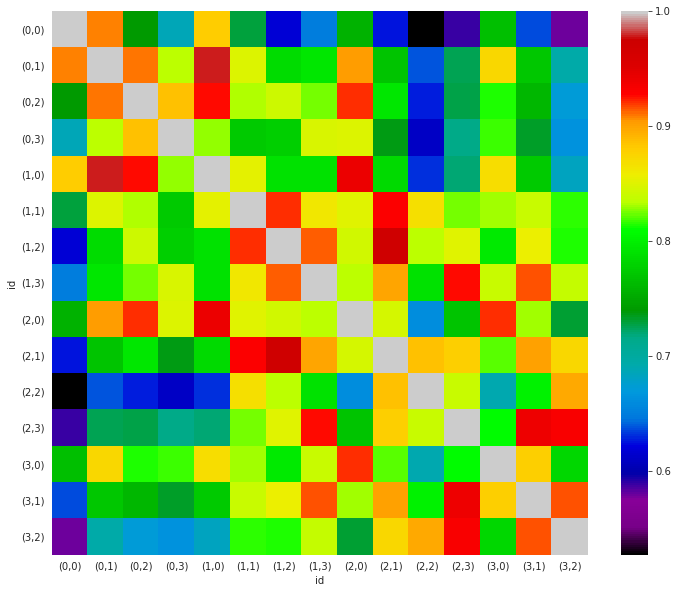

In [132]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='nipy_spectral')
plt.yticks(rotation=0);

In [97]:
df

,id,val
0,"(0,0)",8.461822
1,"(0,0)",13.391186
2,"(0,0)",11.587382
3,"(0,0)",4.885253
4,"(0,0)",6.686709
...,...,...
21995,"(3,2)",87.576575
21996,"(3,2)",76.222168
21997,"(3,2)",9.900515
21998,"(3,2)",-13.068788


In [87]:
np.where(downsampled.mean(-1) == 0)

(array([0, 0, 0, 1, 6, 6, 7, 7, 7, 7]), array([0, 6, 7, 7, 6, 7, 0, 5, 6, 7]))

In [90]:
df = pd.DataFrame(downsampled.reshape(-1, nt).T)
df.shape

(22000, 16)

In [91]:
corr = df.corr()

In [92]:
corr.shape

(16, 16)

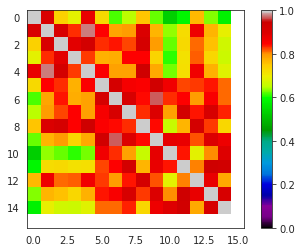

In [94]:
plt.imshow(corr, vmin=0, vmax=1, cmap='nipy_spectral')
plt.colorbar()

## Discussion

...